<a href="https://colab.research.google.com/github/Digvijayapatro/linear_regression/blob/main/Supervised_learning_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
#importing the libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style


In [40]:
#importing the dataset
df=pd.read_csv("/content/Medical Price Dataset.csv")

In [41]:
#view the data set that is impported
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [42]:
#find the number of rows and columns in data set
df.shape

(1338, 7)

In [43]:
#get the summary of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [44]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [45]:
# check any null value is present or not
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

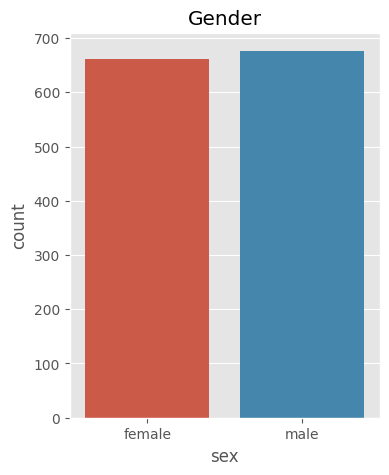

In [46]:
plt.figure(figsize=(4,5))
style.use('ggplot')
sns.countplot(x='sex', data=df)
plt.title('Gender')
plt.show()

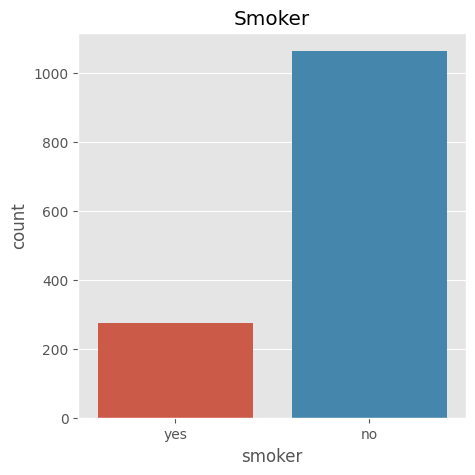

In [47]:
plt.figure(figsize=(5,5))
sns.countplot(x='smoker', data=df)
plt.title('Smoker')
plt.show()

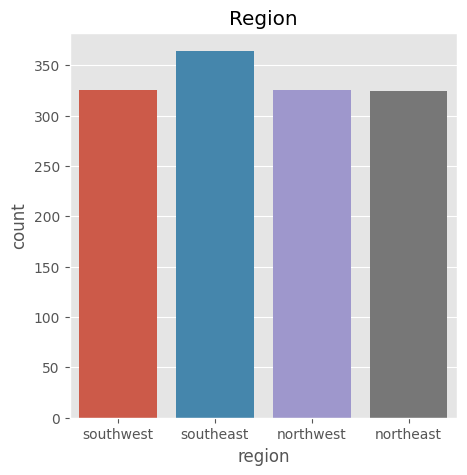

In [48]:
plt.figure(figsize=(5,5))
sns.countplot(x='region', data=df)
plt.title('Region')
plt.show()

Text(0.5, 1.0, 'Cost vs Region')

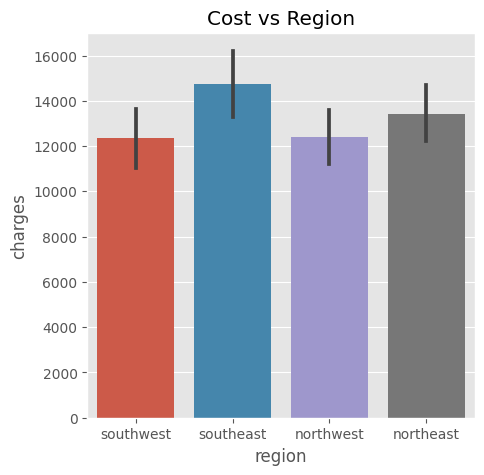

In [49]:
plt.figure(figsize=(5,5))
sns.barplot(x='region', y='charges', data=df)
plt.title('Cost vs Region')

Text(0.5, 1.0, 'Charges for smokers')

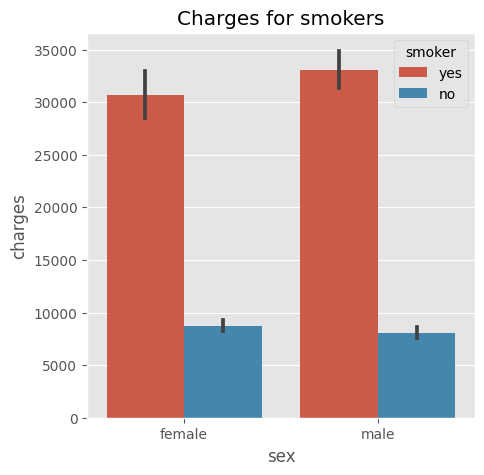

In [50]:
plt.figure(figsize=(5,5))
sns.barplot(x='sex', y='charges',hue='smoker', data=df)
plt.title('Charges for smokers')

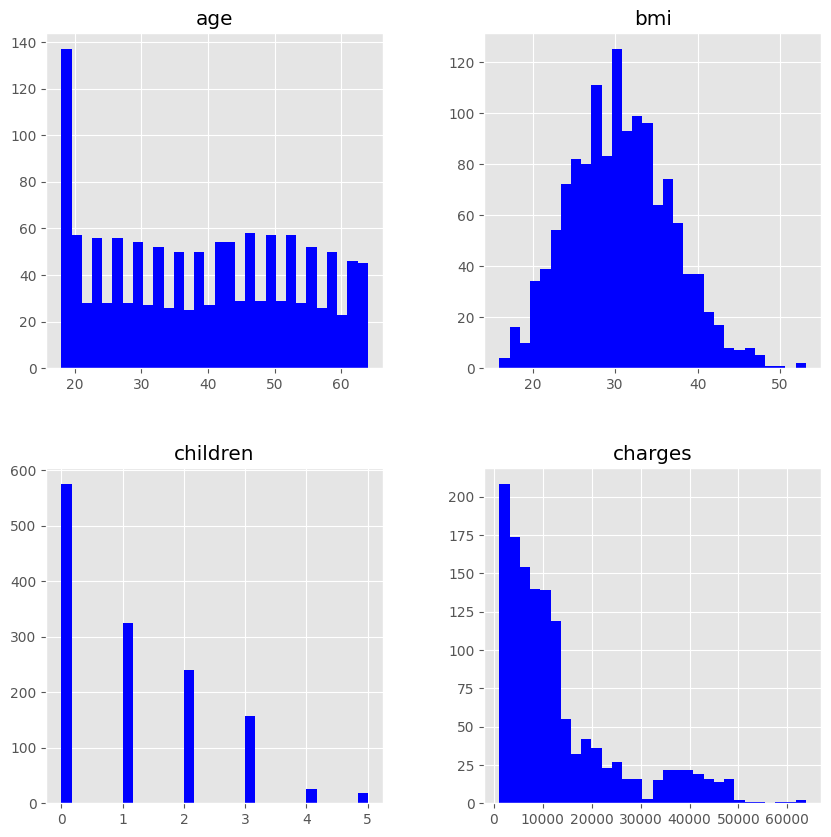

In [51]:
# histohram 
df[['age','bmi','children','charges']].hist(bins=30, figsize=(10,10), color='blue')
plt.show()

In [52]:
#get the overall statistics about the data set
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [53]:
df.dropna(inplace=True)

In [54]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [55]:
# converting categorical values into numerical value by encoding technique
df['sex'] = df['sex'].apply({'male':0, 'female':1}.get)
df['smoker'] = df['smoker'].apply({'yes':1, 'no':0}.get)
df['region'] = df['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

In [56]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


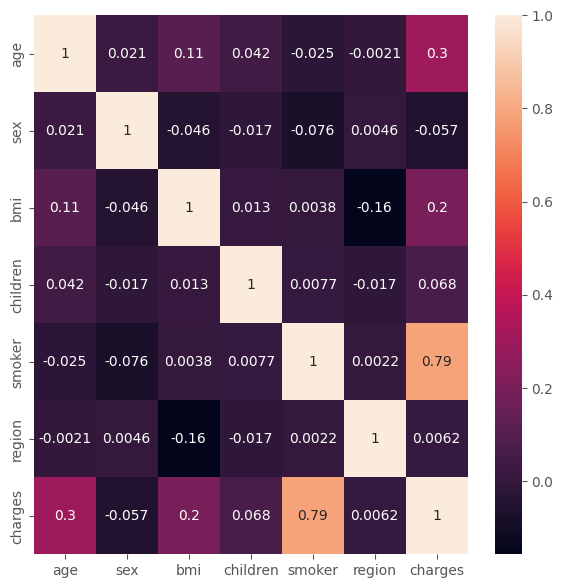

In [77]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [58]:
X = df.drop(['charges', 'sex'], axis=1)
y = df.charges

In [68]:
# function for train test spliting
def train_test_split(X, y, test_size=0.2, n_samples=2000,random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    
    n_samples = X.shape[0]
    n_test = int(np.ceil(test_size * n_samples))
    test_indices = np.random.choice(np.arange(n_samples), size=n_test, replace=False)
    train_indices = np.setdiff1d(np.arange(n_samples), test_indices)
    
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    return X_train, X_test, y_train, y_test

In [69]:
def linear_regression(X, y):
   
    
# Convert X and y to numeric arrays
    X_extended = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
    X_extended = X_extended.astype(float)
    y = y.astype(float)

# Calculate the coefficients using matrix operations
    coefficients = np.linalg.inv(X_extended.T.dot(X_extended)).dot(X_extended.T).dot(y)
    return coefficients

In [70]:
# train and test spliting
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

In [73]:
coefficients = linear_regression(X_train, y_train)


In [74]:
# Convert X_test_extended and coefficients to numeric arrays
X_test_extended = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)
X_test_extended = X_test_extended.astype(float)
coefficients = coefficients.astype(float)

# Calculate the predictions
y_pred = X_test_extended.dot(coefficients)

In [76]:
# Calculate R-squared
y_mean = np.mean(y_test)
ss_total = np.sum((y_test - y_mean) ** 2)
ss_residual = np.sum((y_test - y_pred) ** 2)
r_squared = 1 - (ss_residual / ss_total)


print("R-squared:", r_squared)


R-squared: 0.7833112270019789


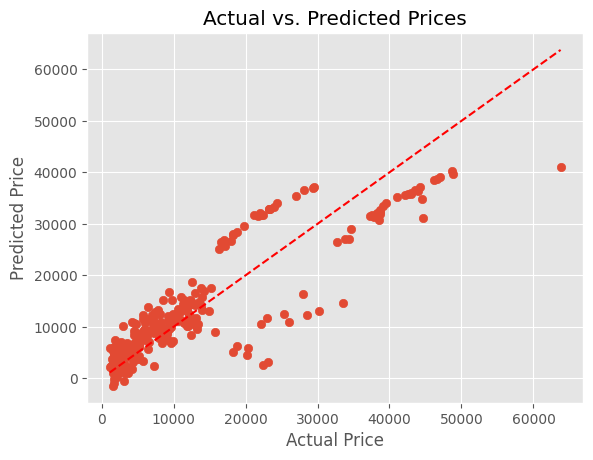

In [78]:
# regression line for actual price and predicted prices
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')
plt.show()
